In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_style("whitegrid")


In [20]:
df = pd.read_csv(
    "ASI_close_prices_last_15_years_2025-06-05.csv",
    parse_dates=["date"]
)
df = df.sort_values("date").set_index("date")

df.head()


,close
date,
2012-02-23,5507.6021
2012-02-24,5566.2998
2012-02-27,5476.5898
2012-03-05,5464.8101
2012-03-06,5477.6699


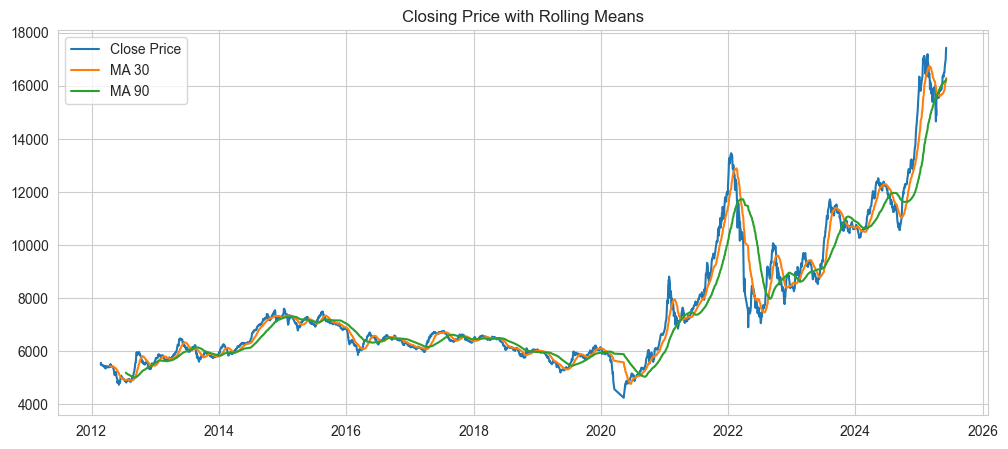

In [21]:
plt.plot(df["close"], label="Close Price")
plt.plot(df["close"].rolling(30).mean(), label="MA 30")
plt.plot(df["close"].rolling(90).mean(), label="MA 90")
plt.legend()
plt.title("Closing Price with Rolling Means")
plt.show()

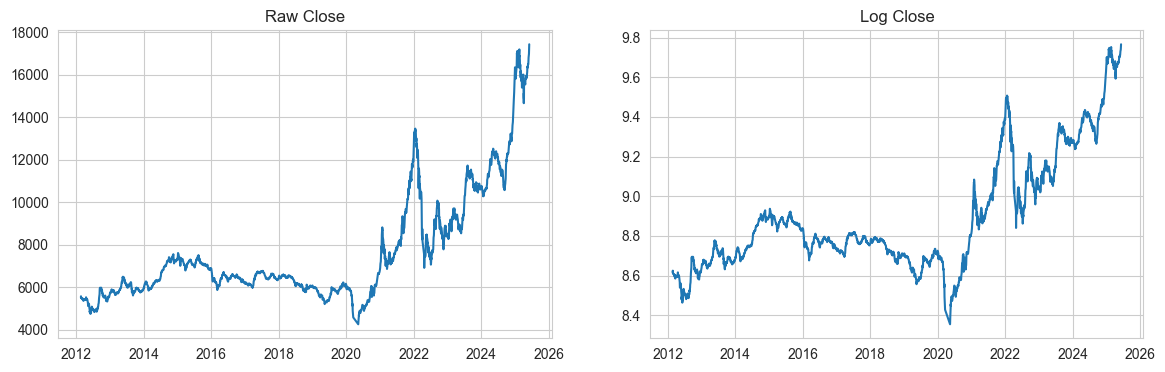

In [22]:
df["log_close"] = np.log(df["close"])

fig, ax = plt.subplots(1, 2, figsize=(14,4))
ax[0].plot(df["close"])
ax[0].set_title("Raw Close")

ax[1].plot(df["log_close"])
ax[1].set_title("Log Close")
plt.show()


C:\Users\Dushan Jalath\AppData\Local\Temp\ipykernel_43600\630536930.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["returns"] = df["close"].pct_change()


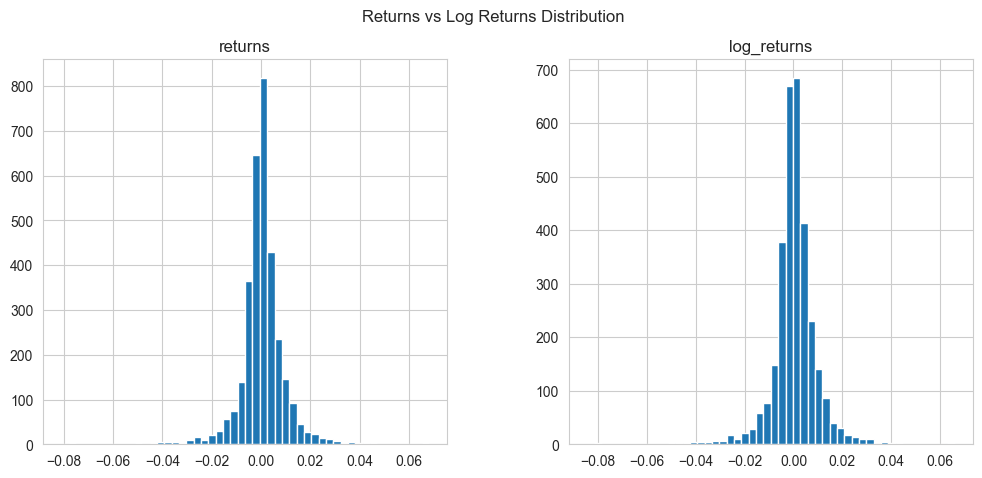

In [23]:
df["returns"] = df["close"].pct_change()
df["log_returns"] = df["log_close"].diff()

df[["returns", "log_returns"]].hist(bins=50)
plt.suptitle("Returns vs Log Returns Distribution")
plt.show()


In [24]:
def adf_test(series, name=""):
    series = series.dropna()
    result = adfuller(series)
    print(f"{name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("-"*40)

adf_test(df["close"], "Close")
adf_test(df["log_close"], "Log Close")
adf_test(df["returns"], "Returns")
adf_test(df["log_returns"], "Log Returns")


Close
ADF Statistic: 0.1923
p-value: 0.9718
----------------------------------------
Log Close
ADF Statistic: -0.2003
p-value: 0.9385
----------------------------------------
Returns
ADF Statistic: -9.6942
p-value: 0.0000
----------------------------------------
Log Returns
ADF Statistic: -11.6412
p-value: 0.0000
----------------------------------------


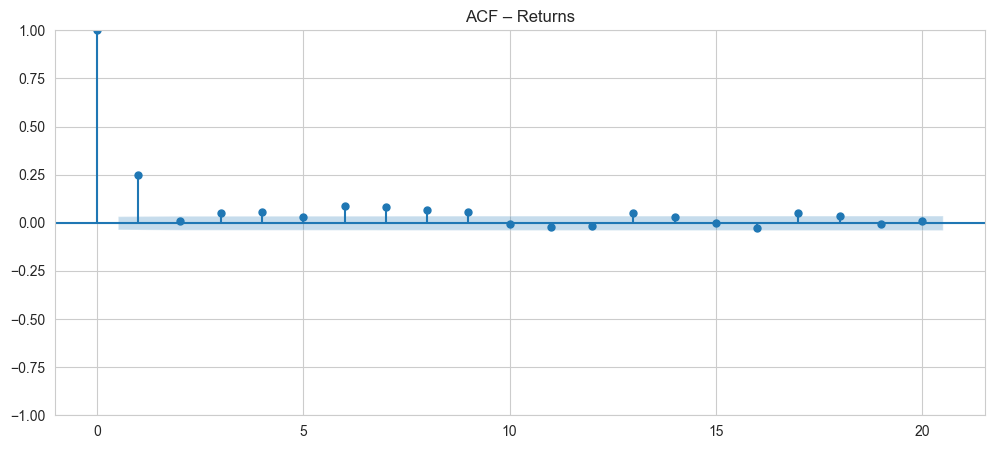

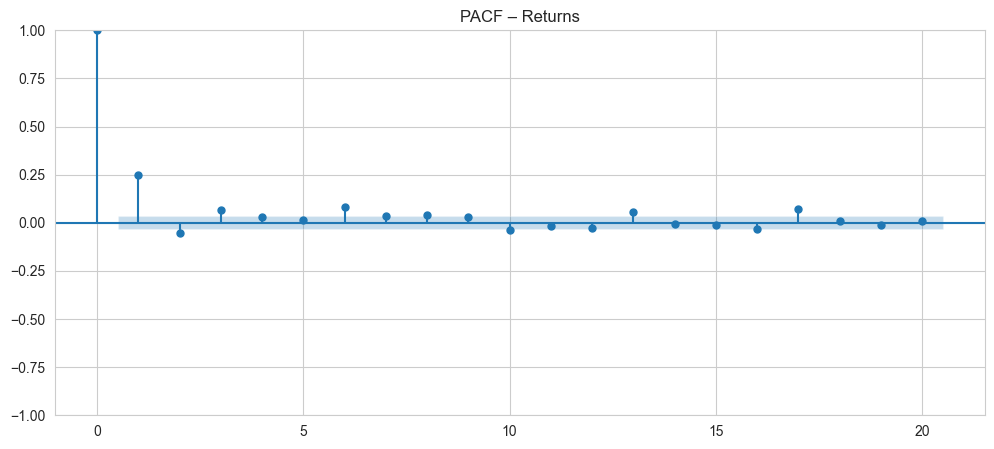

In [25]:
plot_acf(df["returns"].dropna(), lags=20)
plt.title("ACF – Returns")
plt.show()

plot_pacf(df["returns"].dropna(), lags=20, method="ywm")
plt.title("PACF – Returns")
plt.show()


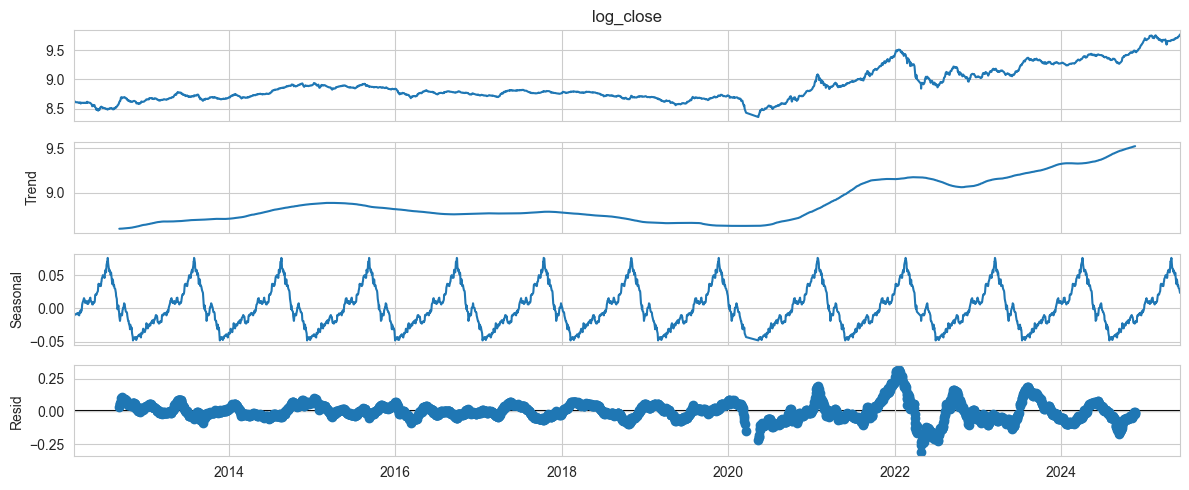

In [26]:
decomp = seasonal_decompose(df["log_close"].dropna(), model="additive", period=252)
decomp.plot()
plt.show()


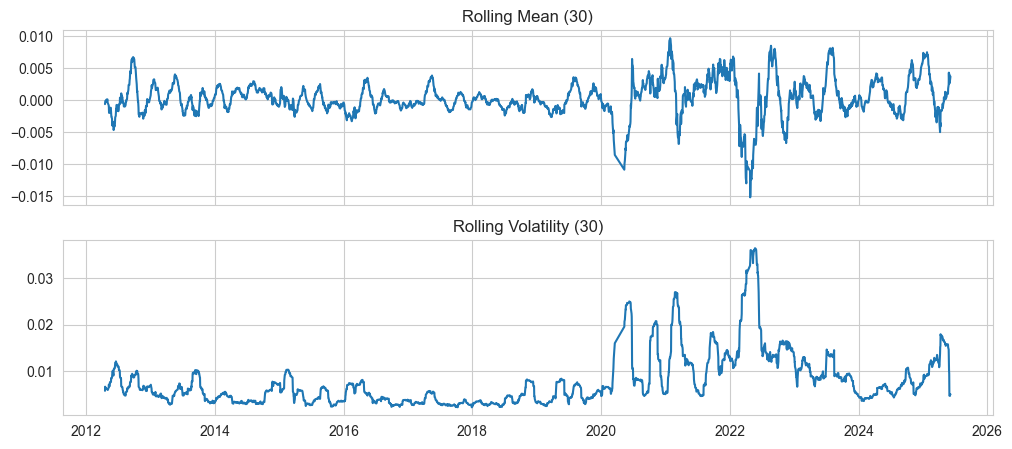

In [27]:
df["rolling_mean_30"] = df["returns"].rolling(30).mean()
df["rolling_vol_30"] = df["returns"].rolling(30).std()

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["rolling_mean_30"])
ax[0].set_title("Rolling Mean (30)")

ax[1].plot(df["rolling_vol_30"])
ax[1].set_title("Rolling Volatility (30)")
plt.show()


In [28]:
for lag in range(1, 6):
    corr = df["returns"].corr(df["returns"].shift(lag))
    print(f"Lag {lag}: correlation = {corr:.4f}")


Lag 1: correlation = 0.2469
Lag 2: correlation = 0.0116
Lag 3: correlation = 0.0503
Lag 4: correlation = 0.0546
Lag 5: correlation = 0.0317


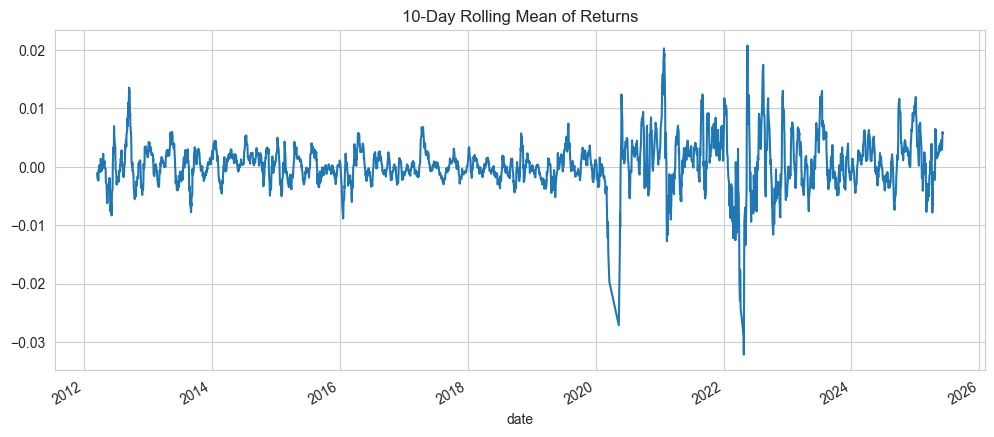

In [29]:
df["returns"].rolling(10).mean().plot(title="10-Day Rolling Mean of Returns")
plt.show()


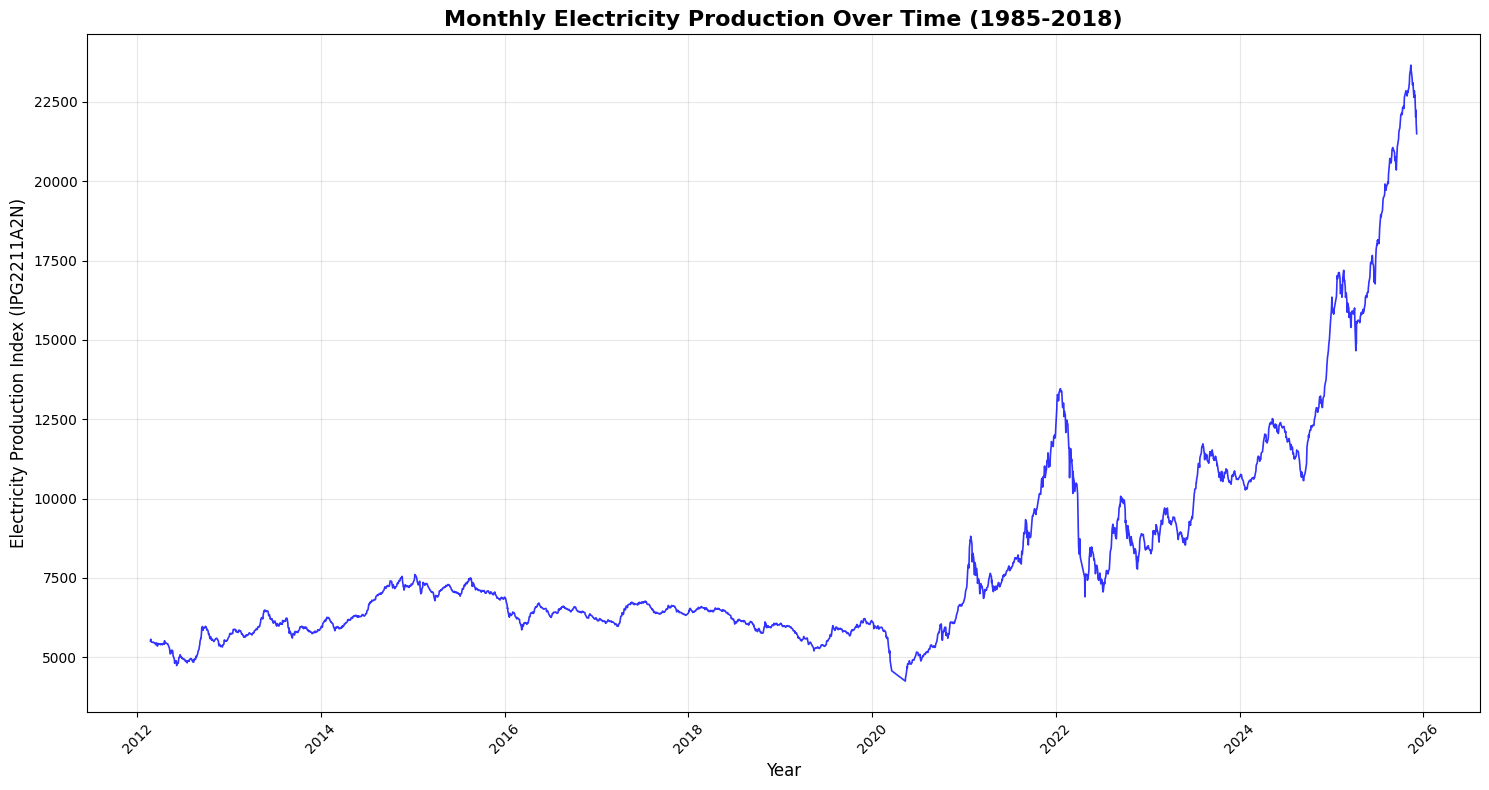

Quick Analysis:
Dataset period: February 2012 to December 2025
Starting value: 5507.60
Ending value: 21497.08
Overall change: 290.3%
Total data points: 3264

Sample yearly pattern (showing cyclical behavior):
2010: Min=nan, Max=nan, Range=nan
2011: Min=nan, Max=nan, Range=nan
2012: Min=4737.8, Max=5972.0, Range=1234.2


In [5]:
# Load the dataset
df = pd.read_csv('ASI_close_prices_last_15_years_2025-12-05.csv')

# Convert DATE column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create the time series plot
plt.figure(figsize=(15, 8))
plt.plot(df['date'], df['close'], linewidth=1.2, color='blue', alpha=0.8)

# Customize the plot
plt.title('Monthly Electricity Production Over Time (1985-2018)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Production Index (IPG2211A2N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add some styling
plt.tight_layout()

# Show the plot
plt.show()

# Quick analysis for answering the questions
print("Quick Analysis:")
print(f"Dataset period: {df['date'].min().strftime('%B %Y')} to {df['date'].max().strftime('%B %Y')}")
print(f"Starting value: {df['close'].iloc[0]:.2f}")
print(f"Ending value: {df['close'].iloc[-1]:.2f}")
print(f"Overall change: {((df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0] * 100):.1f}%")
print(f"Total data points: {len(df)}")

# Check seasonal patterns by looking at a few years of data
print("\nSample yearly pattern (showing cyclical behavior):")
sample_years = df[df['date'].dt.year.isin([2010, 2011, 2012])]
for year in [2010, 2011, 2012]:
    year_data = df[df['date'].dt.year == year]
    print(f"{year}: Min={year_data['close'].min():.1f}, Max={year_data['close'].max():.1f}, Range={year_data['close'].max() - year_data['close'].min():.1f}")